In [23]:
from dataloader import ReyesDataset
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# timer inicial do notebook
import time
start = time.time()

In [24]:
train = ReyesDataset("../dataset/UCI/train.csv")
print(train.X.shape)
# calcula o hierariquico de X
Z = linkage(train.X[:,0,:].reshape(train.X.shape[0],train.X.shape[-1]), 'ward')

(7352, 9, 128)


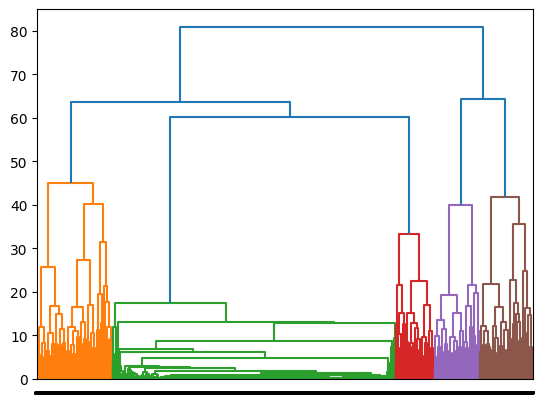

<Figure size 2500x1000 with 0 Axes>

In [25]:
dendrogram(Z, labels=train.Y)

plt.figure(figsize=(25, 10))
plt.show()

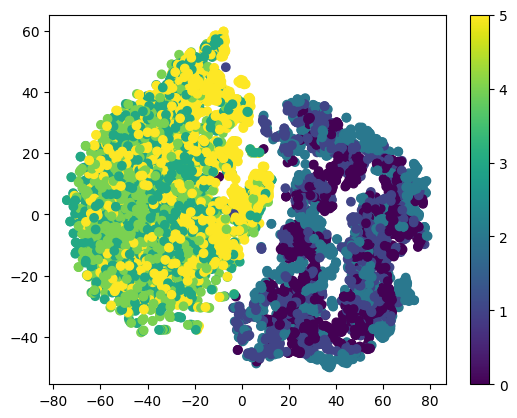

In [26]:
# mostra o tsne desses dados
from sklearn.manifold import TSNE
import numpy as np

X = train.X[:,0,:].reshape(train.X.shape[0],train.X.shape[-1])
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=train.Y)
plt.colorbar()
plt.show()

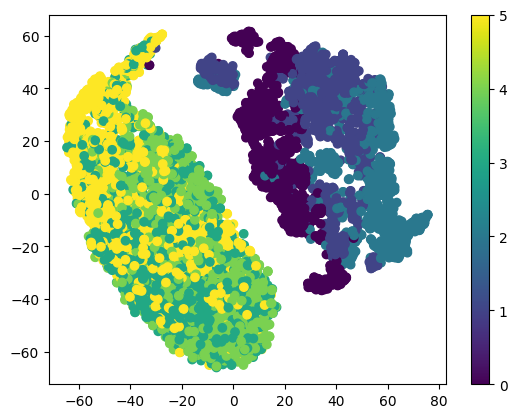

In [27]:
from scipy.fftpack import fft
import numpy as np

X_freq = np.abs(fft(X))
X_freq = X_freq[:,1:X.shape[1]//2]
X_embedded_freq = TSNE(n_components=2).fit_transform(X_freq)
plt.scatter(X_embedded_freq[:,0], X_embedded_freq[:,1], c=train.Y)
plt.colorbar()
plt.show()

In [28]:
Z_freq = linkage(X_freq, 'ward')

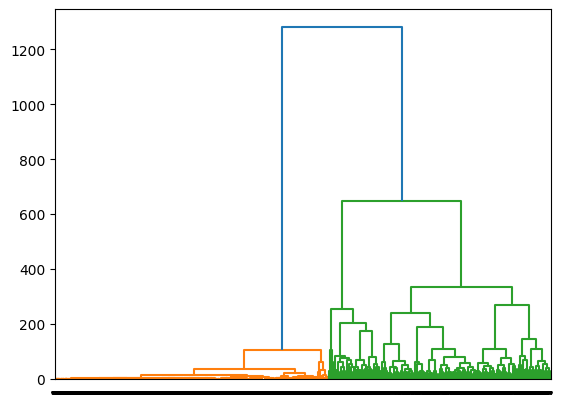

<Figure size 2500x1000 with 0 Axes>

In [29]:
dendrogram(Z_freq, labels=train.Y)

plt.figure(figsize=(25, 10))
plt.show()

In [30]:
import torch
import lightning as L
from tfc import NTXentLoss_poly, TFC_Model, TFC_Backbone
from dataloader import ReyesModule

# Build the pretext model, the pretext datamodule, and the trainer
pretext_model = TFC_Model(backbone=TFC_Backbone(), pred_head=None, loss = NTXentLoss_poly("cuda", 8, 0.2, True)) # batch size 8
pretext_datamodule = ReyesModule(root_data_dir=f"../dataset/UCI/", batch_size=8)
lightning_trainer = L.Trainer(
    accelerator="gpu",
    # max_epochs=40,
    max_epochs=1,
    max_steps=-1,
    enable_checkpointing=True, 
    logger=True)

# Fit the pretext model using the pretext_datamodule
lightning_trainer.fit(pretext_model, pretext_datamodule)

# Save the backbone weights
torch.save(pretext_model.backbone.state_dict(), "weights/pretrained_backbone_weights.pth")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/nicolas/Programas/EpisodeTracker/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type            | Params | Mode 
-----------------------------------------------------
0 | backbone | TFC_Backbone    | 719 K  | train
1 | loss_fn  | NTXentLoss_poly | 0      | train
-----------------------------------------------------
719 K     Trainable params
0         Non-trainable params
719 K     Total params
2.879     Total estimated model params size (MB)
43        Modules in train mode
0         Modules in eval mode
/home/nicolas/Programas/EpisodeTracker/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers 

Epoch 0: 100%|██████████| 919/919 [00:23<00:00, 39.69it/s, v_num=7]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 919/919 [00:23<00:00, 39.65it/s, v_num=7]


In [45]:
print(train.X.shape)
print(train.Y.shape)

print(train.X[0].shape, np.abs(fft(train.X[0])).shape)
pretext_model(train.X, np.abs(fft(train.X)))

(7352, 9, 128)
(7352,)
(9, 128) (9, 128)


TypeError: conv1d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, tuple of ints padding = 0, tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple of (int,)!, !tuple of (int,)!, !tuple of (int,)!, !int!)
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, str padding = "valid", tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple of (int,)!, !tuple of (int,)!, !tuple of (int,)!, !int!)
